#### [ 시도별 전출입 인구수 분석 - Matplotlib ]
- 데이터 셋 : 1907년 ~ 2017년까지 인구 이동 수
- 대구의 타지역 이동 인구 수 분석
- 전국의 인구 이동 수에 대한 분석
- 과정
    * 데이터 파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인
    * 데이터 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복 데이터 처리
        - 형 변환 => 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자 하는 데이터 형태    
        - 행 인덱스 처리 : 멀티 인덱스 / 컬럼 => 행 인덱스 / 행 인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치 / 이상치 / 중복데이터 처리
        - 형 변환 => 연속 -> 범주형, 범주형 -> 연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리


- [1] 준비 과정 : 모듈, 데이터

In [102]:
# [1-1] 모듈 로딩
import pandas as pd                         # 데이터 분석용 모듈
import matplotlib.pyplot as plt             # 데이터 시각화용 모듈
from matplotlib import font_manager as fm, rc

In [103]:
font_path = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\DAY_07\MALGUN.TTF"
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [104]:
# [1-2] 데이터 준비
F_DATA = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\Data\시도별 전출입 인구수.xlsx"

In [105]:
# [1-3] DATA ==> DataFrame 형태 저장
dataDF = pd.read_excel(F_DATA, engine = "openpyxl")

- [2] 데이터 확인 : 행과 컬럼 수, 실제 데이터와 컬럼 타입, 결측치 체크

In [106]:
# [2-1] 기본 정보 확인 => info(), describe()
# - 행 수, 컬럼 수, 컬럼 별 결측치 아닌 (non-null) 데이터 수, 컬럼별 데이터 타입
# - 메모리 사용량
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [107]:
# [2-2] 기본 정보 확인 => info(), describe()
# - 수치 데이터 컬럼의 데이터 분포 확인 : 최대값, 최소값, 표준편차, 사분위수, 평균값
# - 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도수
dataDF.describe(include = "all")

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,3913,822,2026,1468,907,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [108]:
# [2-3] 실제 데이터 info()에서 확인한 타입 비교 => head() / tail()
dataDF.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [109]:
### 기본 정보 확인 후 결과
# - 불필요한 행 / 컬럼 : 0번 행 삭제
# - 결측치 : '전출지별' 컬럼 ==> 이전 행 값으로 아
# - 이상치 : 행별로 "-" 값이 수치값과 섞여 있음 ==> 0 처리 필요!
dataDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


- [3] 데이터 전처리 
    * 기본 확인 파악된 내용들 처리
    * 불필요 데이터 삭제 : 0번 행 삭제
    * 결측치 데이터 처리 : '전출지별' 컬럼 처리
    * 이상치 데이터 처리 : '-'에 대한 처리
    * 데이터 자료형 일치 : 형 변환

In [110]:
# [3-1] 불필요 데이터 처리
copyDF = dataDF.drop(index = 0)
print(f" {copyDF.head()}")

   전출지별   전입지별     1970     1971     1972     1973     1974     1975     1976  \
1   전국     전국  4046536  4210164  3687938  4860418  5297969  9011440  6773250   
2  NaN  서울특별시  1742813  1671705  1349333  1831858  2050392  3396662  2756510   
3  NaN  부산광역시   448577   389797   362202   482061   680984   805979   724664   
4  NaN  대구광역시        -        -        -        -        -        -        -   
5  NaN  인천광역시        -        -        -        -        -        -        -   

      1977  ...     2008     2009     2010     2011     2012     2013  \
1  7397623  ...  8808256  8487275  8226594  8127195  7506691  7411784   
2  2893403  ...  2025358  1873188  1733015  1721748  1555281  1520090   
3   785117  ...   514502   519310   519334   508043   461042   478451   
4        -  ...   409938   398626   370817   370563   348642   351873   
5        -  ...   565585   478169   462051   499567   468666   461613   

      2014     2015     2016     2017  
1  7629098  7755286  7378430  7154226  

In [111]:
# [3-2] 결측치 데이터 처리 => isna()/isnull()
copyDF.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [112]:
# - '1984', '1985', '1986' 컬럼에서 결측치 데이터만 추출
print(copyDF.columns)
a = copyDF[[1984, 1985, 1986]].isna()
a[a.sum(axis = 1) > 0]

Index(['전출지별', '전입지별',   1970,   1971,   1972,   1973,   1974,   1975,   1976,
         1977,   1978,   1979,   1980,   1981,   1982,   1983,   1984,   1985,
         1986,   1987,   1988,   1989,   1990,   1991,   1992,   1993,   1994,
         1995,   1996,   1997,   1998,   1999,   2000,   2001,   2002,   2003,
         2004,   2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,
         2013,   2014,   2015,   2016,   2017],
      dtype='object')


,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [113]:
# - '전출지별'
copyDF["전출지별"].ffill(inplace = True)
copyDF[[1984, 1985, 1986]] = copyDF[[1984, 1985, 1986]].fillna(0)
copyDF.loc[35]

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_16828\3219768211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copyDF["전출지별"].ffill(inplace = True)


전출지별    서울특별시
전입지별     경상남도
1970     8409
1971    10001
1972    11263
1973    15193
1974    16771
1975    23150
1976    22400
1977    27393
1978    28697
1979    30183
1980    29205
1981    28795
1982    28250
1983    30485
1984        0
1985        0
1986        0
1987    26970
1988    26801
1989    24189
1990    24216
1991    21999
1992    21546
1993    19398
1994    17887
1995    19306
1996    19061
1997    12855
1998    13340
1999    13690
2000    11741
2001    12100
2002    12290
2003    13827
2004    12973
2005    14076
2006    14510
2007    16015
2008    15438
2009    15303
2010    15689
2011    16039
2012    14474
2013    14447
2014    14799
2015    15220
2016    13717
2017    12692
Name: 35, dtype: object

In [114]:
df2 = pd.DataFrame([[1, 1, pd.NA], [pd.NA, pd.NA, 2], [pd.NA, 3, 3]])
df2

,0,1,2
0,1,1,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [115]:
# 0번 컬럼을 이전 행 값으로 채우기
df2[0]

0       1
1    <NA>
2    <NA>
Name: 0, dtype: object

In [116]:
a = df2[0].ffill(inplace = True)
print(a, df2, sep = "\n")

None
   0     1     2
0  1     1  <NA>
1  1  <NA>     2
2  1     3     3


C:\Users\KDP-2\AppData\Local\Temp\ipykernel_16828\26185921.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a = df2[0].ffill(inplace = True)


In [117]:
df2[[1, 2]].ffill(inplace = True)

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_16828\223606431.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[[1, 2]].ffill(inplace = True)
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_16828\223606431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[[1, 2]].ffill(inplace = True)


In [118]:
# [3-3] 이상치 데이터 처리
copyDF.replace("-", 0, inplace = True)

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_16828\1022306753.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copyDF.replace("-", 0, inplace = True)


In [119]:
# [3-4] 자료형 변환 
d_ = dict(zip(copyDF.columns[2:].to_list(), ['int'] * (copyDF.shape[1]-2)))

copyDF = copyDF.astype(d_)

In [120]:
print(f"copyDF.dtypes \n {copyDF.dtypes}")

copyDF.dtypes 
 전출지별    object
전입지별    object
1970     int64
1971     int64
1972     int64
1973     int64
1974     int64
1975     int64
1976     int64
1977     int64
1978     int64
1979     int64
1980     int64
1981     int64
1982     int64
1983     int64
1984     int64
1985     int64
1986     int64
1987     int64
1988     int64
1989     int64
1990     int64
1991     int64
1992     int64
1993     int64
1994     int64
1995     int64
1996     int64
1997     int64
1998     int64
1999     int64
2000     int64
2001     int64
2002     int64
2003     int64
2004     int64
2005     int64
2006     int64
2007     int64
2008     int64
2009     int64
2010     int64
2011     int64
2012     int64
2013     int64
2014     int64
2015     int64
2016     int64
2017     int64
dtype: object


#### [4] 데이터 가공
    * 대구에서 전지역 전입 인구수 분석
    * 전출지별 - '대구광역시'
    * 전입지별 - '대구광역시', '전국' 제외

In [121]:
# - 대구광역시 데이터만 추출
mask = (copyDF['전출지별'] == "대구광역시") 
cityDF = copyDF[mask]
cityDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [122]:
# - 전출지별 컬럼 삭제
cityDF = cityDF.drop("전출지별", axis = 1)

# - 전입지별 커럼 행 인덱스 설정
cityDF.set_index("전입지별", inplace = True)

In [123]:
# - 대구광역시, 전국 행 삭제
cityDF.drop(["대구광역시", "전국"], inplace = True)

In [124]:
# - 가공데이터 확인
print(cityDF.dtypes, cityDF.columns, cityDF.index, sep = "\n\n")

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 201

[5] 분석 : 대구에서 전지역 전입 인구수 분석

In [125]:
# [5-1] 대구에서 전지역으로의 전입 인구수 분석

cityDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


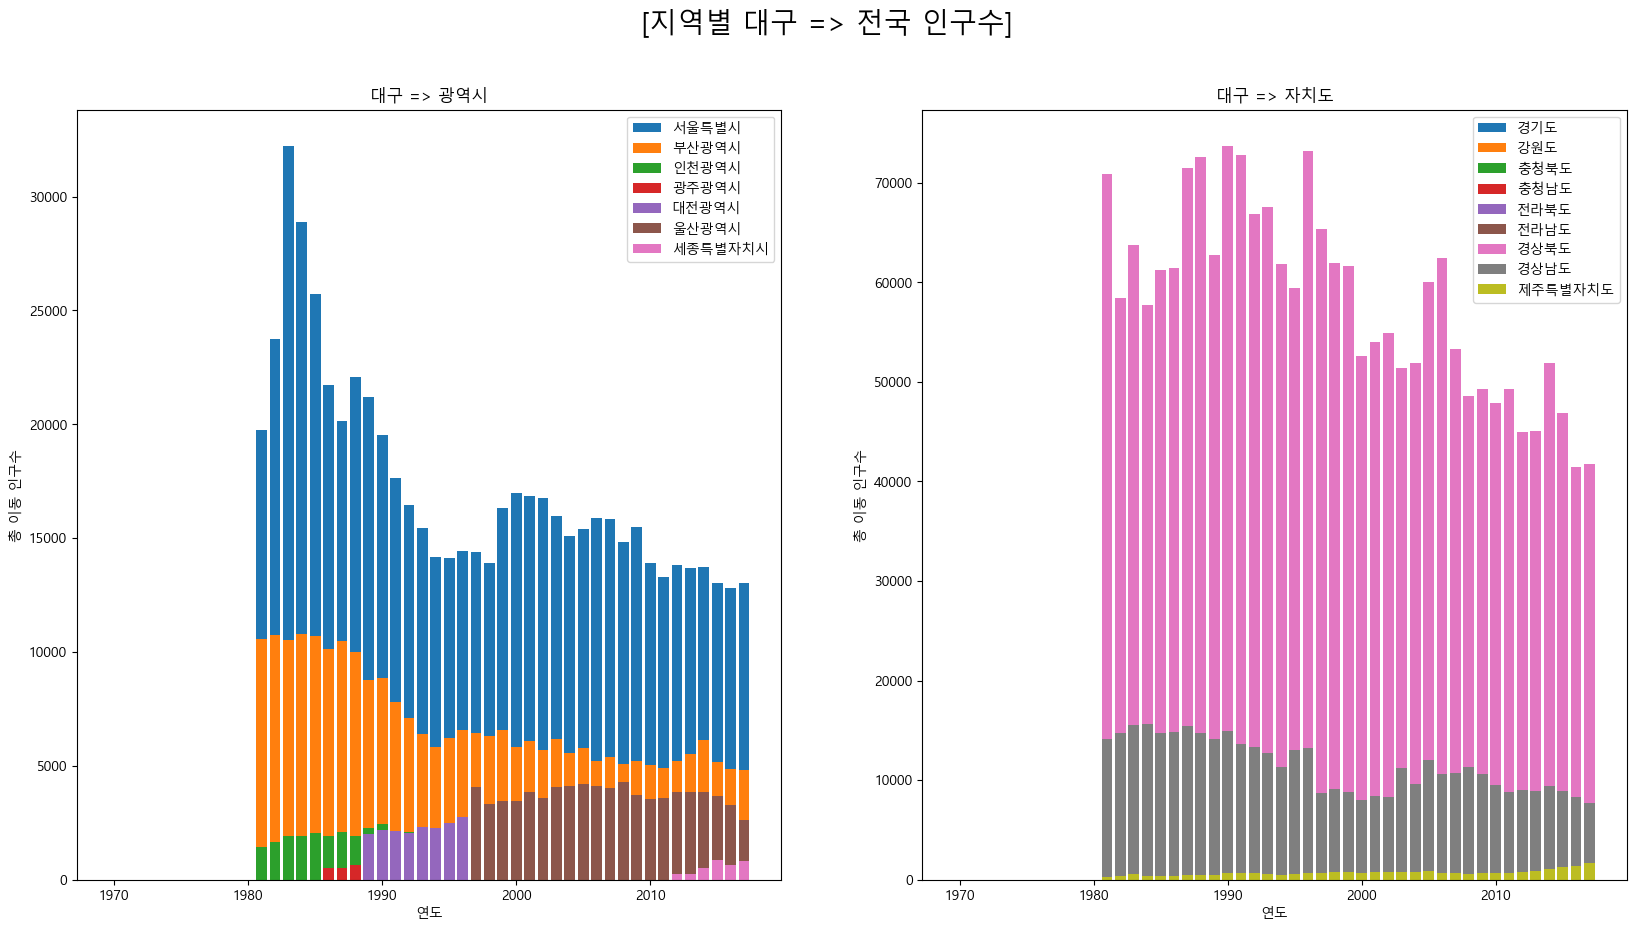

In [144]:
fig = plt.figure(figsize = (20, 10))
axes = fig.subplots(1, 2)

for i in range(len(cityDF[:7])):    
    axes[0].bar(cityDF.columns, cityDF[:7].iloc[i], label = cityDF[:7].index[i])
axes[0].legend()
axes[0].set_title("대구 => 광역시")
axes[0].set_xlabel("연도")
axes[0].set_ylabel("총 이동 인구수")

for i in range(len(cityDF[7:])):
    axes[1].bar(cityDF.columns, cityDF[7:].iloc[i], label = cityDF[7:].index[i])
axes[1].legend()
axes[1].set_title("대구 => 자치도")
axes[1].set_xlabel("연도")
axes[1].set_ylabel("총 이동 인구수")


fig.suptitle("[지역별 대구 => 전국 인구수]", size = 20)
plt.show()

In [145]:
moveTotalDF = cityDF.sum(axis = 1)
print(moveTotalDF.index)

Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='전입지별')


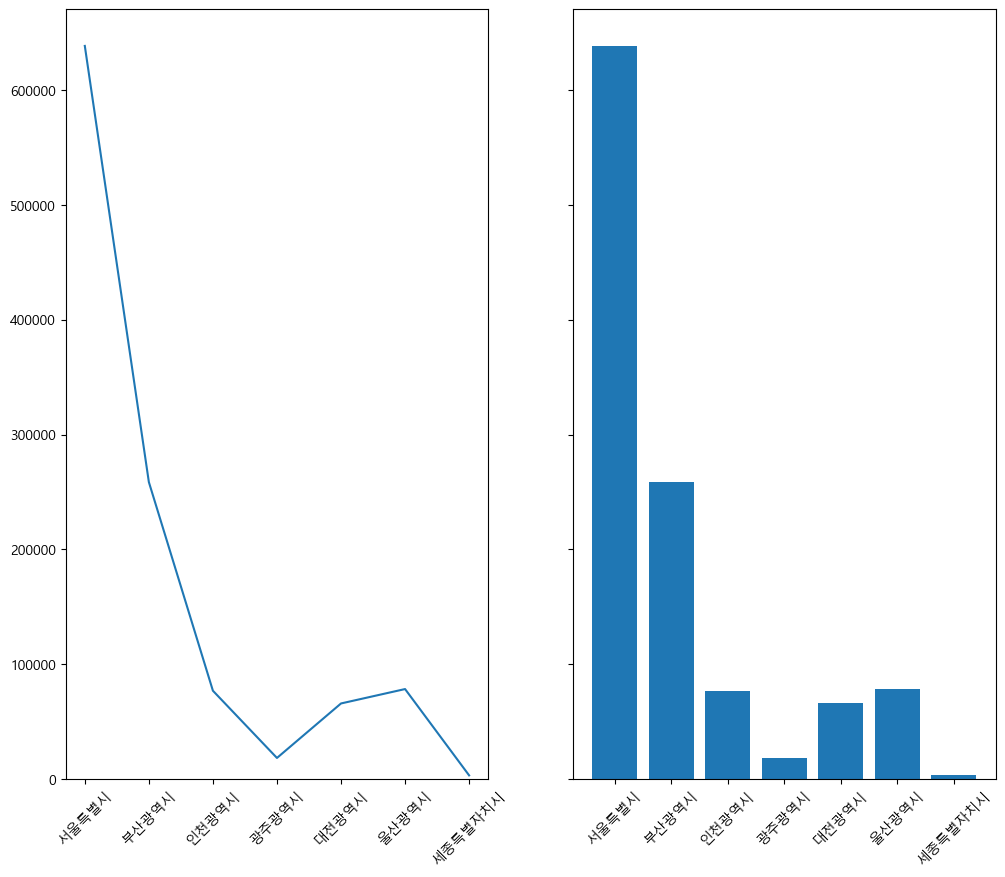

In [152]:
fig = plt.figure(figsize = (12, 10))
ax1, ax2 = fig.subplots(1, 2, sharey = True)

ax1.plot(moveTotalDF[:7])
import numpy as np
ax1.set_xticks(np.arange(0, 7, 1), moveTotalDF.index[:7].to_list(), rotation = 45)

ax2.bar(moveTotalDF.index[:7], moveTotalDF[:7])
ax2.set_xticks(np.arange(0, 7, 1), moveTotalDF.index[:7].to_list(), rotation = 45)